In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  11.1  1749.6 ...  4.7  1.0  0.0]
 [ 1.0  11.8  873.8 ...  4.6  1.0  0.0]
 [ 1.0  30.0  2284.5 ...  4.5  1.0  0.0]
 ...
 [ 1.0  24.6  1779.0 ...  5.1  0.9  0.0]
 [ 0.0  13.0  1017.9 ...  7.6  0.9  0.0]
 [ 0.0  8.8  416.0 ...  3.9  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 11, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 6, axis = 1)
brainT = np.delete(brainT, 5, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 2, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 1.0  0.0  0.0  0.0  0.3]
 [ 1.0  0.0  0.1  0.0  0.4]
 [ 1.0  0.0  0.1  0.0  0.5]
 ...
 [ 1.0  0.0  0.1  0.0  0.4]
 [ 0.0  0.1  0.3  0.1  0.5]
 [ 0.0  0.1  0.2  0.1  0.5]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 1s 6ms/step - loss: 0.6718 - accuracy: 0.5752 - val_loss: 0.6523 - val_accuracy: 0.5434
Epoch 2/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.5566 - val_loss: 0.6268 - val_accuracy: 0.5434
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6117 - accuracy: 0.5566 - val_loss: 0.6013 - val_accuracy: 0.5434
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.5566 - val_loss: 0.5727 - val_accuracy: 0.5461
Epoch 5/500
83/83 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.6450 - val_loss: 0.5426 - val_accuracy: 0.7278
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 0.5251 - accuracy: 0.7855 - val_loss: 0.5131 - val_accuracy: 0.7934
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.8235 - val_loss: 0.4832 - val_accuracy: 0.8493
Epoch 8/500
8

Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9749 - val_loss: 0.1130 - val_accuracy: 0.9770
Epoch 60/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9738 - val_loss: 0.1125 - val_accuracy: 0.9770
Epoch 61/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9738 - val_loss: 0.1123 - val_accuracy: 0.9770
Epoch 62/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9761 - val_loss: 0.1112 - val_accuracy: 0.9770
Epoch 63/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1119 - accuracy: 0.9742 - val_loss: 0.1110 - val_accuracy: 0.9770
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9746 - val_loss: 0.1110 - val_accuracy: 0.9778
Epoch 65/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.9753 - val_loss: 0.1098 - val_accuracy: 0.9770
Epoch 

83/83 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9776 - val_loss: 0.1003 - val_accuracy: 0.9778
Epoch 117/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9757 - val_loss: 0.1007 - val_accuracy: 0.9787
Epoch 118/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9765 - val_loss: 0.1006 - val_accuracy: 0.9787
Epoch 119/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9776 - val_loss: 0.1001 - val_accuracy: 0.9787
Epoch 120/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9768 - val_loss: 0.1001 - val_accuracy: 0.9787
Epoch 121/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9772 - val_loss: 0.1000 - val_accuracy: 0.9787
Epoch 122/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9765 - val_loss: 0.0999 - val_accuracy: 0.9787
Epoch 123/500

83/83 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9780 - val_loss: 0.0962 - val_accuracy: 0.9787
Epoch 174/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9776 - val_loss: 0.0964 - val_accuracy: 0.9787
Epoch 175/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9784 - val_loss: 0.0959 - val_accuracy: 0.9787
Epoch 176/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.9768 - val_loss: 0.0960 - val_accuracy: 0.9787
Epoch 177/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0973 - accuracy: 0.9780 - val_loss: 0.0959 - val_accuracy: 0.9787
Epoch 178/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9772 - val_loss: 0.0962 - val_accuracy: 0.9787
Epoch 179/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.9776 - val_loss: 0.0955 - val_accuracy: 0.9787
Epoch 180/500

83/83 [==============================] - 0s 4ms/step - loss: 0.0948 - accuracy: 0.9765 - val_loss: 0.0933 - val_accuracy: 0.9787
Epoch 231/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0948 - accuracy: 0.9776 - val_loss: 0.0928 - val_accuracy: 0.9796
Epoch 232/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9776 - val_loss: 0.0928 - val_accuracy: 0.9796
Epoch 233/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9768 - val_loss: 0.0936 - val_accuracy: 0.9778
Epoch 234/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9776 - val_loss: 0.0925 - val_accuracy: 0.9796
Epoch 235/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9768 - val_loss: 0.0931 - val_accuracy: 0.9787
Epoch 236/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9772 - val_loss: 0.0937 - val_accuracy: 0.9778
Epoch 237/500

83/83 [==============================] - 0s 6ms/step - loss: 0.0924 - accuracy: 0.9776 - val_loss: 0.0901 - val_accuracy: 0.9787
Epoch 288/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9765 - val_loss: 0.0905 - val_accuracy: 0.9778
Epoch 289/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9776 - val_loss: 0.0903 - val_accuracy: 0.9787
Epoch 290/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9776 - val_loss: 0.0898 - val_accuracy: 0.9796
Epoch 291/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9768 - val_loss: 0.0895 - val_accuracy: 0.9796
Epoch 292/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9765 - val_loss: 0.0899 - val_accuracy: 0.9796
Epoch 293/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0921 - accuracy: 0.9772 - val_loss: 0.0897 - val_accuracy: 0.9796
Epoch 294/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0900 - accuracy: 0.9776 - val_loss: 0.0882 - val_accuracy: 0.9778
Epoch 345/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 0.9772 - val_loss: 0.0876 - val_accuracy: 0.9778
Epoch 346/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0901 - accuracy: 0.9772 - val_loss: 0.0875 - val_accuracy: 0.9787
Epoch 347/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0899 - accuracy: 0.9776 - val_loss: 0.0878 - val_accuracy: 0.9778
Epoch 348/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0899 - accuracy: 0.9768 - val_loss: 0.0872 - val_accuracy: 0.9796
Epoch 349/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9768 - val_loss: 0.0879 - val_accuracy: 0.9778
Epoch 350/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9772 - val_loss: 0.0882 - val_accuracy: 0.9778
Epoch 351/500

83/83 [==============================] - 1s 8ms/step - loss: 0.0881 - accuracy: 0.9772 - val_loss: 0.0855 - val_accuracy: 0.9778
Epoch 402/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0879 - accuracy: 0.9776 - val_loss: 0.0848 - val_accuracy: 0.9796
Epoch 403/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0881 - accuracy: 0.9765 - val_loss: 0.0854 - val_accuracy: 0.9778
Epoch 404/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0880 - accuracy: 0.9780 - val_loss: 0.0848 - val_accuracy: 0.9796
Epoch 405/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0880 - accuracy: 0.9772 - val_loss: 0.0851 - val_accuracy: 0.9778
Epoch 406/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0880 - accuracy: 0.9768 - val_loss: 0.0850 - val_accuracy: 0.9787
Epoch 407/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0879 - accuracy: 0.9768 - val_loss: 0.0852 - val_accuracy: 0.9778
Epoch 408/500

83/83 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9772 - val_loss: 0.0834 - val_accuracy: 0.9778
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.9768 - val_loss: 0.0832 - val_accuracy: 0.9796
Epoch 460/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9772 - val_loss: 0.0826 - val_accuracy: 0.9796
Epoch 461/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9772 - val_loss: 0.0831 - val_accuracy: 0.9787
Epoch 462/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0861 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9796
Epoch 463/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0862 - accuracy: 0.9768 - val_loss: 0.0831 - val_accuracy: 0.9778
Epoch 464/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0861 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9796
Epoch 465/500

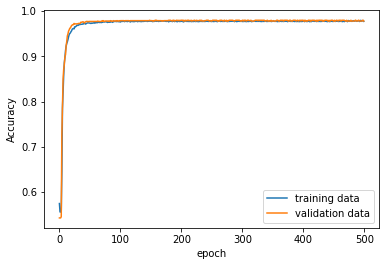

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9780


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9778


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
83/83 [==============================] - 0s 2ms/step
[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9902826855123675
0.9597602739726028
0.9747826086956521


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
36/36 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9861111111111112
0.9650485436893204
0.9754661432777233
